# ヘミシンク音声の解析

ヘミシンクはバイノーラルビートで作成されているので、左右のチャンネルに分解してから  
それぞれのピーク周波数を比較することで誘導脳波の周波数を求めることができる

In [1]:
%matplotlib inline
import IPython.display
import wavio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def _plot_channel(channel, f_s, threshold, show):
    fft_x = np.fft.fft(channel)
    n = len(fft_x)
    freq = np.fft.fftfreq(n, 1/f_s)
    fft_x_shifted = np.fft.fftshift(fft_x)
    freq_shifted = np.fft.fftshift(freq)
    freq = freq_shifted
    db = 20 * np.log10(np.abs(fft_x_shifted))
    index, peaks = find_peaks(db, height=threshold)
    peak_freq = set()
    current_freq = 0
    for i in index:
        if freq[i] > 20 and freq[i] > current_freq+30:
            current_freq = freq[i]
            peak_freq.add(int(freq[i]))
    peak_freq = sorted(peak_freq)
    if show:
        print(f"ピーク値: {'Hz, '.join(map(str, peak_freq))}Hz")
        plt.axhline(y=threshold, color='c')
        plt.plot(freq, db)
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("dB")
        plt.yscale('log')
        plt.xlim(0, 4096)
        plt.ylim(0, 200)
        plt.show()
        plt.clf()
        plt.close()
    return peak_freq

def plot_spec(file_name, th1 = 100, th2 = 100, show=False):
    File = wavio.read(file_name)
    rate = File.rate
    channel_1 = File.data[:,0]
    channel_2 = File.data[:,1]
    ch1_peak = _plot_channel(channel_1, rate, th1, show)
    ch2_peak = _plot_channel(channel_2, rate, th2, show)
    offset_peak = np.array(ch2_peak) - np.array(ch1_peak)
    print(f"ピークの差分(誘導脳波): {'Hz, '.join(map(str, offset_peak))}Hz")

## バイノーラルビート音源を作成してみる

バイノーラルビートの理論により、ヘッドホンまたはイヤホンからの2つの異なる周波数の信号が、それぞれの耳に1つずつ別々に提示され、  
脳は周波数間の位相変化を検出し、その差を調整しようとします。脳波への影響は、各音の周波数の違いによって異なります。  
たとえば、片方の耳で400 Hzを再生し、もう一方の耳で430を再生した場合、バイノーラルビートの周波数は30Hzになります。

In [2]:
!pip install AccelBrainBeat pydub numba

/tmp/ipykernel_820621/2487008983.py:16: RuntimeWarning: divide by zero encountered in log10
  db = 20 * np.log10(np.abs(fft_x_shifted))
/tmp/ipykernel_820621/2487008983.py:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 200)


ピーク値: 100Hz


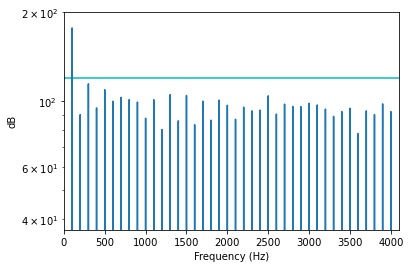

/tmp/ipykernel_820621/2487008983.py:16: RuntimeWarning: divide by zero encountered in log10
  db = 20 * np.log10(np.abs(fft_x_shifted))
/tmp/ipykernel_820621/2487008983.py:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 200)


ピーク値: 104Hz


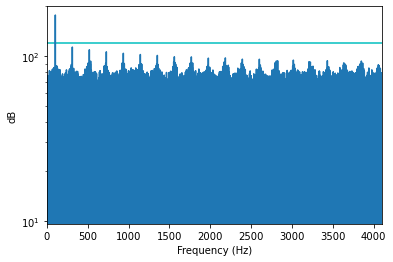

ピークの差分(誘導脳波): 4Hz


In [18]:
from AccelBrainBeat.brainbeat.binaural_beat import BinauralBeat

brain_beat = BinauralBeat() # for binaural beats.
file_name = "test.wav"
brain_beat.save_beat(
    output_file_name=file_name,
    frequencys=(100, 104), # キャリアー周波数
    play_time=100,
    volume=0.01
)
plot_spec(file_name, th1=120, th2=120, show=True)

### 幽体離脱のための音源として有名なヘキサストライク4hz

ピーク値: 89Hz, 199Hz, 500Hz, 999Hz


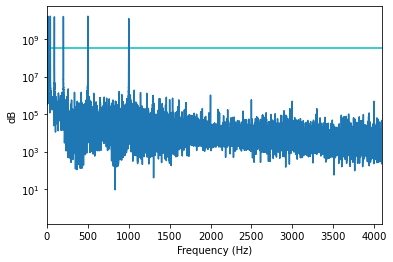

ピーク値: 93Hz, 203Hz, 504Hz, 1003Hz


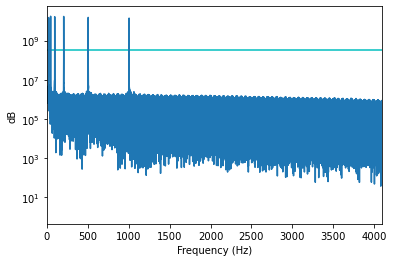

ピークの差分(誘導脳波): 4Hz, 4Hz, 4Hz, 4Hz


In [4]:
file_name = "HexaStrike_4hz.wav"
plot_spec(file_name, show=True)

## ゲートウェイシリーズの分析

ゲートウェイを含めたヘミシンクシリーズは、バイノーラルビートをベースとした脳波のダビング技術によって特殊な精神状態や体験を誘導するものである。

### フォーカス10
身体が眠り、意識が目覚めている状態肉体は完全にリラックスして､  
肉体からの知覚信号はほとんどなく、心だけが目覚めて意識がはっきりした状態です。

In [16]:
file_name = "フォーカス/F10.wav"
plot_spec(file_name, th1=170, th2=170, show=False)

ピークの差分(誘導脳波): 4Hz, 4Hz, -4Hz


### フォーカス12
意識の拡大した状態・肉体的睡眠は深まりますが､肉体からの覚信号  
によって普段は抑えられていたやり方これは、人間の意識がは知覚し始めます。  
肉体へ完全に依存した状態から解放され､意識の自由を初めて認識する状態です。

In [19]:
file_name = "フォーカス/F12.wav"
plot_spec(file_name, th1=170, th2=170, show=False)

ピークの差分(誘導脳波): 0Hz, 1Hz, 4Hz, 4Hz, 4Hz, 10Hz, 10Hz, 10Hz


### フォーカス15
時間のない状態･フォーカス15では、意識が肉体の知覚から段階的に解放され、  
時間のない状態を経験し始めます。 フォーカス15は、心が目覚めた状態のまま  
であることを除くと、深い睡眠状態に似ています。

In [14]:
file_name = "フォーカス/F15.wav"
plot_spec(file_name, th1=174, th2=174, show=False)

ピークの差分(誘導脳波): -1Hz, -4Hz, 0Hz, -4Hz, 8Hz, -7Hz, -8Hz


### フォーカス21
他のエネルギー系・人間の時空のの端であり、非常に深い眠状態にありますが、意識は明瞭で活発に活動しています。

In [13]:
file_name = "フォーカス/F21.wav"
plot_spec(file_name, th1=174, th2=174, show=False)

ピークの差分(誘導脳波): 0Hz, 4Hz, 4Hz, 4Hz, 16Hz, 16Hz


### フォーカス23
肉体が死んだ直後の状態・非常に活発な領域で、肉体の死を経てきた人  
たちで溢れています。 彼らは激しい感情の中にいたり、あるいは、思考停止状態や、  
乱した状態にいます。

In [12]:
file_name = "フォーカス/F23.wav"
plot_spec(file_name, th1=174, th2=174, show=False)

ピークの差分(誘導脳波): -1Hz, -1Hz, -4Hz, -4Hz, -4Hz, -7Hz


### フォーカス25
人間世界の歴史に最近登場した主要な組織化されたの信念の表れ。  
これには、宗教活動により区別される、キリスト教、仏教、ヒンドゥ教、ユダヤ教 イ  
スラム教などの宗教とそのすべての宗派が含まれます。 この世界を訪れた人は、自分の  
人生で重要な要素であった信念領域にのみ引き付けられます。 それ以外の信念領域はぼ  
んやりとした揺らめくパターンとして認識されます。 個人の知識、経験、および関心に  
よりはっきり見える度合いが異なります。

In [11]:
file_name = "フォーカス/F25.wav"
plot_spec(file_name, th1=165, th2=165, show=False)

ピークの差分(誘導脳波): -1Hz, 4Hz, 4Hz, 4Hz, 3Hz, 4Hz, 3Hz, 4Hz, 3Hz


### フォーカス27
現在組織化されつつある人間思考能力の先端、 「公園」のある場所、肉  
体の死によるトラウマから回復し、休息するための中継点。

In [10]:
file_name = "フォーカス/F27.wav"
plot_spec(file_name, th1=156, th2=157, show=False)

ピークの差分(誘導脳波): -1Hz, 4Hz, 4Hz, 4Hz, 4Hz, 4Hz, 0Hz


## シングル・タイトルの解析

### Einstein's Dream

In [7]:
file_name = "Einsteins_Dream/Concentration.wav"
plot_spec(file_name, th1=190, th2=190, show=False)

ピークの差分(誘導脳波): -4Hz, -16Hz


In [8]:
file_name = "Einsteins_Dream/Attention.wav"
plot_spec(file_name, th1=190, th2=190, show=False)

ピークの差分(誘導脳波): -8Hz, -16Hz, -24Hz


### 情報にアクセスする

In [ ]:
file_name = "情報にアクセスする/Access_to_Information.wav"
plot_spec(file_name)

### ヘミシンクによるヒーリング・ジャーニーズ・サポート

In [ ]:
file_name = "ヘミシンクによるヒーリング・ジャーニーズ・サポート/Heart_Energy.wav"
plot_spec(file_name)

### パティ・サマーズの「動物たちと話そう」

In [ ]:
file_name = "Communicating_with_Animals.wav"
plot_spec(file_name)

## 音声を分解してみる

## 覚醒音の繰り返し

In [9]:
file_name = "wakeup.wav"
plot_spec(file_name, th1=170, th2=170, show=False)

ピークの差分(誘導脳波): 16Hz, 40Hz
